In [ ]:
# Step 1: Data Loading & Exploration

import pandas as pd

# Load metadata
df = pd.read_csv(r"C:\Users\User\PYTHON-PLP8\Frameworks_Assignment\data\metadata.csv")
df_sample = df.head(1000)  # take first 1000 rows
df_sample.to_csv("data/metadata_sample.csv", index=False)

# Quick look
print(df.shape)
print(df.info())
print(df.head())

# Missing values
print(df.isnull().sum().sort_values(ascending=False))


C:\Users\User\AppData\Local\Temp\ipykernel_34720\1940619792.py:6: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\User\PYTHON-PLP8\Frameworks_Assignment\data\metadata.csv")


(1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null  

In [2]:
# Step 2: Data Cleaning

# Handle missing publish_time
df = df.dropna(subset=['publish_time'])

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Extract year
df['year'] = df['publish_time'].dt.year

# Abstract word count
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))


In [3]:
!pip install seaborn



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


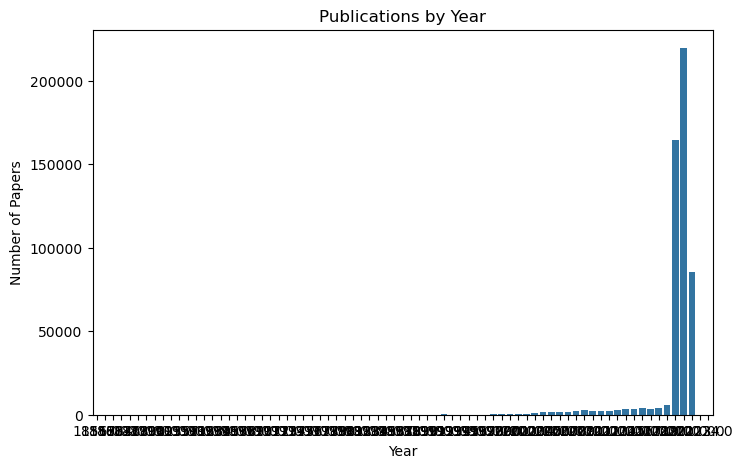

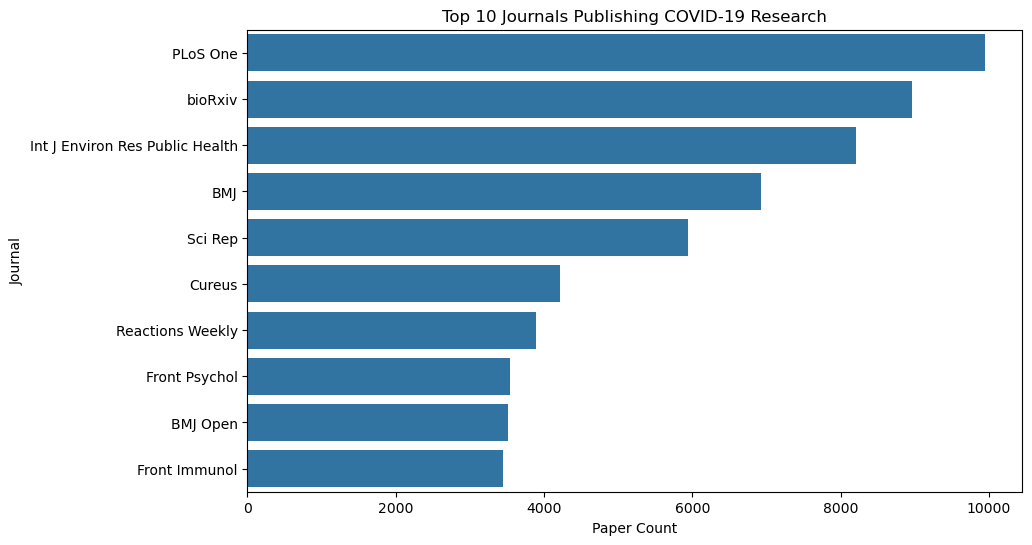

In [4]:
# Step 3: Analysis & Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Publications by year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(8,5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

# Top journals
top_journals = df['journal'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_journals.index, x=top_journals.values)
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Paper Count")
plt.ylabel("Journal")
plt.show()
